# Домашнее задание №1 - Изучение методов анализа и классификации данных
## Введение
В современном цифровом мире сети являются основными артериями, по которым передаются данные. Однако, наряду с легитимным трафиком, по сетям также передается и вредоносная информация. Для обеспечения безопасности и защиты информации необходимо эффективно обнаруживать и блокировать такие угрозы. Источником данных [`datasets/malicious.csv`](./datasets/malicious.csv) для нашего анализа послужил реальный сетевой трафик, содержащий трафик эксфильтрации данных.

- Эксфильтрация данных представляет собой скрытую передачу конфиденциальной информации за пределы защищенной сети.

## Описание задания
Цель данного задания — разработка и обучение моделей машинного обучения для классификации сетевых потоков на вредоносные и безопасные. Для этого мы будем использовать базовый алгоритм классификации, такой как `RandomForest`.

В рамках данной работы вам необходимо выполнить ряд действий, давайте приступим!

### Подготовка виртуального окружения Python
Предварительно нужно установить все зависимые модули. Все необходимые зависимости перечислены в requirements.txt файле. Чтобы установить зависимости, выполните в терминале следующую команду:
```sh
python3 -m pip install -r requirements.txt
```

### Загрузить данные
Предварительно, необходимо загрузить исходные данные из файла [datasets/malicious.csv](datasets/malicious.csv). Можете воспользоваться функцией `load_data`, которая загрузит csv файл в объект pandas.DataFrame.

`pandas.DataFrame` — это двумерная табличная структура данных в библиотеке Pandas для языка программирования Python. Она представляет собой таблицу с рядами и столбцами, где каждый столбец может содержать данные различного типа (числа, строки, булевы значения и т.д.), подобно таблицам в реляционных базах данных или электронных таблицах. `pandas.DataFrame`  предоставляет очень удобный функционал по работе с табличными данными, что весьма ценно в области Машинного обучения.

### Изучение исходных данных
Когда у вас есть любые данные, после их загрузки необходимо провести первичный анализ, чтобы лучше понять их структуру и особенности. Это важно для дальнейшего построения моделей машинного обучения и выполнения различных аналитических задач. Ниже приведены основные шаги для исследования данных:

**Шаг 1**: Вывод общей информации о столбцах данных и их типах
Для начала, важно понять структуру вашего набора данных: сколько столбцов он содержит, какие у них названия и какие типы данных в них представлены. Это можно сделать с помощью метода `pandas.DataFrame.info()`, который предоставляет подробную информацию о DataFrame, включая количество записей, типы данных каждого столбца и количество ненулевых значений. 
Этот шаг поможет вам быстро сориентироваться в данных и определить, какие столбцы требуют дальнейшего внимания или предобработки.

**Шаг 2**: Вывод общей информации о данных в столбцах
Далее, стоит получить сводную статистическую информацию о данных в каждом столбце. Это можно сделать с помощью метода `pandas.DataFrame.describe()`, который предоставляет основные статистические показатели для числовых столбцов, такие как среднее значение, стандартное отклонение, минимальные и максимальные значения, а также квартильные значения.
Эти данные дают представление о распределении значений в каждом столбце и помогают выявить аномалии или выбросы.

**Шаг 3**: Проверка пропусков данных
Пропуски в данных могут значительно повлиять на качество анализа и моделей машинного обучения. Чтобы выявить наличие пропущенных значений, используйте метод `pandas.DataFrame.isnull().sum()`, который покажет количество пропущенных значений в каждом столбце.
Этот шаг позволяет определить, какие столбцы требуют обработки пропусков, например, заполнения средними значениями, медианами или удаления строк.

**Шаг 4**: Построение распределения исходных данных
Для визуализации распределения данных в каждом столбце можно использовать гистограммы: используйте метод `pandas.DataFrame.hist()`. Гистограмма показывает, как распределены значения в столбце, и помогает выявить схему распределения (например, нормальное распределение, смещение и т.д.). Гистограммы дают визуальное представление о плотности данных и позволяют быстро оценить общие тенденции.

**Шаг 5**: Построение boxplot
Для более детальной визуализации распределения данных можно использовать boxplot (или диаграммы размаха): `pandas.DataFrame.boxplot()`. Boxplot показывает медиану, квартильные значения, а также потенциальные выбросы.
`Boxplot` (или диаграмма размаха) — это графический метод отображения статистических данных, который позволяет визуализировать распределение набора данных и выявлять выбросы. Boxplot наглядно показывает центральное значение, разброс и симметрию распределения данных.

**Шаг 6**: Построение матрицы корреляции
Матрица корреляции помогает понять взаимосвязь между числовыми переменными в вашем наборе данных. Она показывает, как сильно связанные между собой переменные и позволяет выявить возможные зависимости или мультиколлинеарность.
Для построения матрицы корреляции используйте функцию `plot_corr_matrix()` для расчета корреляций между переменными, а затем визуализируйте ее с помощью тепловой карты.

**Шаг 7**: Определение соотношения классов в исходном наборе данных. Классы записаны в столбце `label`. Для начала определите сколько всего классов есть. После чего подсчитайте итоговое соотношение классов.

**Шаг 8**: Подведите итог исследования исходного набора данных, что вы наблюдаете? Какие столбцы из исходного набора данных могут быть использованы для дальнейшего обучения?

### Фильтрация данных
После выполнения анализа исходного набора данных, можно приступать к обработке исходных данных. Первым шагом чаще всего является фильтрация набора данных, удаление выбросов из исходного набора данных. 

Фильтрация данных — это ключевой шаг в подготовке данных для анализа и построения моделей машинного обучения. Неправильные или крайние значения могут сильно искажать результаты и приводить к ненадежным выводам. На этом шаге мы рассмотрим два популярных метода фильтрации данных: Boxplot и Z-оценка. Каждый из них имеет свои преимущества и может быть выбран в зависимости от характера данных и целей анализа.

Разделить DataFrame относительно классов, чтобы доминирующий класс не повлиял на фильтрацию данных меньших классов.

Отфильтруйте DataFrame полученных с прошлых шагов с использованием функций:
- `remove_outliers_quartile` фильтрация на основе квартилей, которые мы наблюдали при построение boxplot, значения находящиеся за усами будут отброшены (удаленны из исходного DataFrame)
- `remove_outliers_zscore` фильтрация на основе Z-оценки — это мера, которая показывает, насколько значение в наборе данных отклоняется от среднего значения этого набора, выраженная в стандартных отклонениях

После чего постройте boxplot полученного нового DataFrame. Что вы видите теперь, что-то изменилось?

### Преобразование данных
После фильтрации данных, следующим важным шагом является преобразование данных. Преобразование данных необходимо для подготовки данных к анализу и построению моделей машинного обучения. На этом шаге мы рассмотрим два основных метода преобразования данных: `StandardScaler` и `PowerTransformer`. Каждый из этих методов имеет свои особенности и применяется для решения различных задач.

Преобразование данных: Зачем это нужно?

Преобразование данных помогает нормализовать или стандартизировать данные, устраняя различия в масштабах и распределениях. Это важно для улучшения производительности моделей машинного обучения и повышения точности прогнозов. Преобразование данных может также помочь сделать данные более симметричными и привести их к нормальному распределению. Например, PCA предполагает многомерную нормальность распределения данных, аналогично K-NN чувствителен к масштабу и распределению данных.

`StandardScaler` — это метод стандартизации данных, который приводит их к нулевому среднему значению и единичному стандартному отклонению. Этот метод полезен, когда данные имеют разный масштаб или когда признаки имеют разные единицы измерения.

`PowerTransformer` — это метод преобразования данных, который применяется для улучшения симметрии распределения данных и приведения их к нормальному распределению. Это особенно полезно, когда данные имеют сильное смещение или отклонения от нормального распределения. В его основе лежит два типа преобразований: Box-Cox и Yeo-Johnson. Box-Cox требует положительных данных, тогда как Yeo-Johnson работает с любыми данными.

Воспользуйтесь обоими преобразованиями и постройте распределения признаков, после их преобразования.

### Обучение модели RandomForest
После фильтрации и преобразования данных мы готовы приступить к обучению модели. Для этого домашнего задания мы выберем модель RandomForest, которая хорошо справляется с задачами классификации и регрессии, обладает высокой устойчивостью к выбросам и способностью выявлять важные признаки.

`RandomForest` — это ансамблевый метод машинного обучения, который строит множество деревьев решений и объединяет их прогнозы для улучшения общей производительности. Модель RandomForest является устойчивой к переобучению, так как каждое дерево обучается на случайной подвыборке данных и использует случайный набор признаков.

Поскольку у нас имеется только один набор данных, то мы хотим протестировать модель полностью на нем усреднив результаты тестирования, воспользуемся для этого методом кросс-валидации.

Кросс-валидация — это метод оценки качества модели, при котором данные делятся на несколько частей (фолдов), и модель обучается на одной части, а тестируется на другой. Процесс повторяется несколько раз, чтобы каждая часть данных использовалась как для обучения, так и для тестирования. В результате мы получаем усреднённую оценку производительности модели, что делает её более надежной. Можете воспользоваться заготовленной функцией `cross_validation`.

## Ожидаемый результат
В качестве артефакта домашнего задания №1 должен выступать заполненный notebook, в рамках которого были произведены все расписанные шаги с пояснением, а также дамп обученной модели. Получить дамп модели довольно легко, воспользуйтесь `pickle.dumps()`

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
def load_data(csv_file):
    # инициализация DataFrame данными из csv-файла
    df = pd.read_csv(csv_file)
    # отбрасывание первой колонки, т.к. там содержится номера строк и в работе они не пригодятся
    df = df.iloc[:, 1:]
    # отбрасываем пустые строки
    df.dropna(inplace=True)

    return df

In [3]:
def plot_corr_matrix(df):
    # Построение матрицы корреляции
    correlation_matrix = df[df.select_dtypes(include=['float64', 'int64']).columns].corr()
    
    # Визуализация матрицы корреляции
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Матрица корреляции')
    plt.show()

In [4]:
def remove_outliers_quartile(df):
    # Перебор всех числовых столбцов для удаления выбросов
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Расчет первого и третьего квартилей
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        # Межквартильный размах
        IQR = Q3 - Q1

        # Определение нижней и верхней границ для определения выбросов
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Фильтрация данных, удаление значений, выходящих за пределы границ
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

def remove_outliers_zscore(df, threshold=3):
    # Вычисление Z-оценок для всех числовых столбцов
    z_scores = np.abs(stats.zscore(df.select_dtypes(include=['float64', 'int64'])))
    # Определение строк, которые не содержат выбросов (все значения меньше порога)
    filtered_entries = (z_scores < threshold).all(axis=1)
    
    return df[filtered_entries]

In [5]:
def cross_validation(clf, X, y):
    """
    Выполняет кросс-валидацию для модели RandomForest и возвращает результаты точности на каждом этапе,
    а также наилучшую обученную модель с максимальной точностью.

    Параметры:
    - clf (Модель классификации, например, RandomForest)
    - X (DataFrame или массив): Признаки (features) набора данных.
    - y (Series или массив): Метки классов (targets) набора данных.

    Возвращает:
    - accuracy_scores(list): Массив точностей на каждом фолде.
    - best_сlf  (тип исходной модели): Наилучший экземпляр полученный на кросс-валидации
    """
    # Создание стратифицированных фолдов для кросс-валидации
    skf = StratifiedKFold(n_splits=3)
    # Список для хранения точностей по фолдам
    accuracy_scores = []
    # Список для хранения обученных моделей
    clfs = []
    for train, test in skf.split(X, y):
        # Разделение данных на обучающие и тестовые фолды
        X_train, y_train, X_test, y_test = X[train], y[train], X[test], y[test]
        # Обучение модели на текущем обучающем фолде
        clf.fit(X_train, y_train)
        # Предсказание меток для тестового фолда
        y_pred = clf.predict(X_test)
        # Оценка точности модели на текущем фолде
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        # Сохранение текущей обученной модели
        clfs.append(clf)
     # Возвращение точностей для каждого фолда и лучшей модели (с максимальной точностью)
    return accuracy_scores, clfs[
        max(
            enumerate(accuracy_scores),
            key=lambda x: x[1]
        )[0]
    ]

In [6]:
df = load_data('datasets/malicious.csv')
df

,Flow,max_interpacket_interval,min_interpacket_interval,avg_interpacket_interval,sum_interpacket_interval,max_packet_length,min_packet_length,avg_packet_length,sum_packet_length,mode_packet_length,label
0,97.68.56.122:57851<-->89.22.59.116:443,0.028121,0.000000,0.003680,0.055207,1292,64,345.812500,5533,73,normal
1,57.181.239.188:49345<-->247.209.38.226:443,7.384422,0.000000,0.273928,13.422484,283,63,92.720000,4636,74,normal
2,123.47.11.54:53083<-->112.93.224.70:443,14.998336,0.000000,0.535138,165.892857,1287,66,201.344051,62618,75,normal
3,201.76.252.193:138<-->200.7.7.115:138,1487.119726,0.000221,332.496371,10307.387513,258,216,247.406250,7917,258,normal
4,230.168.24.60:8009<-->4.184.58.159:43606,5.012900,0.000187,2.502647,4327.077487,274,54,110.010983,190319,164,normal
...,...,...,...,...,...,...,...,...,...,...,...
7788,189.193.148.106:50188<-->59.22.166.177:443,15.104434,0.000002,3.167563,152.043016,1514,66,354.142857,17353,66,malicious
7789,42.155.188.234:50194<-->253.35.112.8:443,19.711976,0.000003,2.118520,156.770474,1514,66,314.746667,23606,143,malicious
7790,61.225.152.29:50200<-->229.199.5.56:443,20.736114,0.000002,2.508330,158.024818,2962,66,399.734375,25583,66,malicious
7791,119.61.220.97:50206<-->20.235.187.145:443,15.231748,0.000002,1.809193,161.018195,1514,66,305.788889,27521,153,malicious


# Изучение исходных данных

## Шаг 1: Вывод общей информации о столбцах данных и их типах 
Для начала, важно понять структуру вашего набора данных: сколько столбцов он содержит, какие у них названия и какие типы данных в них представлены. Это можно сделать с помощью метода pandas.DataFrame.info(), который предоставляет подробную информацию о DataFrame, включая количество записей, типы данных каждого столбца и количество ненулевых значений. Этот шаг поможет вам быстро сориентироваться в данных и определить, какие столбцы требуют дальнейшего внимания или предобработки.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793 entries, 0 to 7792
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Flow                      7793 non-null   object 
 1   max_interpacket_interval  7793 non-null   float64
 2   min_interpacket_interval  7793 non-null   float64
 3   avg_interpacket_interval  7793 non-null   float64
 4   sum_interpacket_interval  7793 non-null   float64
 5   max_packet_length         7793 non-null   int64  
 6   min_packet_length         7793 non-null   int64  
 7   avg_packet_length         7793 non-null   float64
 8   sum_packet_length         7793 non-null   int64  
 9   mode_packet_length        7793 non-null   int64  
 10  label                     7793 non-null   object 
dtypes: float64(5), int64(4), object(2)
memory usage: 669.8+ KB


## Шаг 2: Вывод общей информации о данных в столбцах
Далее, стоит получить сводную статистическую информацию о данных в каждом столбце. Это можно сделать с помощью метода `pandas.DataFrame.describe()`, который предоставляет основные статистические показатели для числовых столбцов, такие как среднее значение, стандартное отклонение, минимальные и максимальные значения, а также квартильные значения.
Эти данные дают представление о распределении значений в каждом столбце и помогают выявить аномалии или выбросы.

In [8]:
df.describe()

,max_interpacket_interval,min_interpacket_interval,avg_interpacket_interval,sum_interpacket_interval,max_packet_length,min_packet_length,avg_packet_length,sum_packet_length,mode_packet_length
count,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7793.000000,7.793000e+03,7793.000000
mean,21.054863,0.000029,1.475881,85.327339,1218.559990,55.283203,333.035265,2.837903e+05,218.704350
std,84.173814,0.000284,6.185053,467.197598,686.357496,14.435200,260.551161,2.831104e+06,436.239806
min,0.002255,0.000000,0.000157,0.004650,66.000000,54.000000,56.285714,1.740000e+02,54.000000
25%,1.262620,0.000000,0.031585,2.219447,571.000000,54.000000,129.785714,1.837000e+03,54.000000
50%,8.511493,0.000000,0.512731,11.867484,1464.000000,54.000000,303.711864,7.124000e+03,54.000000
75%,15.180139,0.000000,1.080536,47.757424,1514.000000,54.000000,395.777778,1.319600e+04,55.000000
max,2395.672766,0.014642,332.496371,10418.113114,7306.000000,1242.000000,1707.877987,1.129131e+08,1514.000000


## Шаг 3: Проверка пропусков данных
Пропуски в данных могут значительно повлиять на качество анализа и моделей машинного обучения. Чтобы выявить наличие пропущенных значений, используйте метод `pandas.DataFrame.isnull().sum()`, который покажет количество пропущенных значений в каждом столбце.
Этот шаг позволяет определить, какие столбцы требуют обработки пропусков, например, заполнения средними значениями, медианами или удаления строк.

In [9]:
df.isnull().sum()

Flow                        0
max_interpacket_interval    0
min_interpacket_interval    0
avg_interpacket_interval    0
sum_interpacket_interval    0
max_packet_length           0
min_packet_length           0
avg_packet_length           0
sum_packet_length           0
mode_packet_length          0
label                       0
dtype: int64

In [10]:
# установка стилей seaborn для всех графиков
sns.set()

# дефалтовый размер графиков (под full-hd разрешение)
sns.set_theme(rc={'figure.figsize': (20, 10)})

## Шаг 4: Построение распределения исходных данных
Для визуализации распределения данных в каждом столбце можно использовать гистограммы: используйте метод `pandas.DataFrame.hist()`. Гистограмма показывает, как распределены значения в столбце, и помогает выявить схему распределения (например, нормальное распределение, смещение и т.д.). Гистограммы дают визуальное представление о плотности данных и позволяют быстро оценить общие тенденции.

## Шаг 5: Построение boxplot
Для более детальной визуализации распределения данных можно использовать boxplot (или диаграммы размаха): `pandas.DataFrame.boxplot()`. Boxplot показывает медиану, квартильные значения, а также потенциальные выбросы.
`Boxplot` (или диаграмма размаха) — это графический метод отображения статистических данных, который позволяет визуализировать распределение набора данных и выявлять выбросы. Boxplot наглядно показывает центральное значение, разброс и симметрию распределения данных.

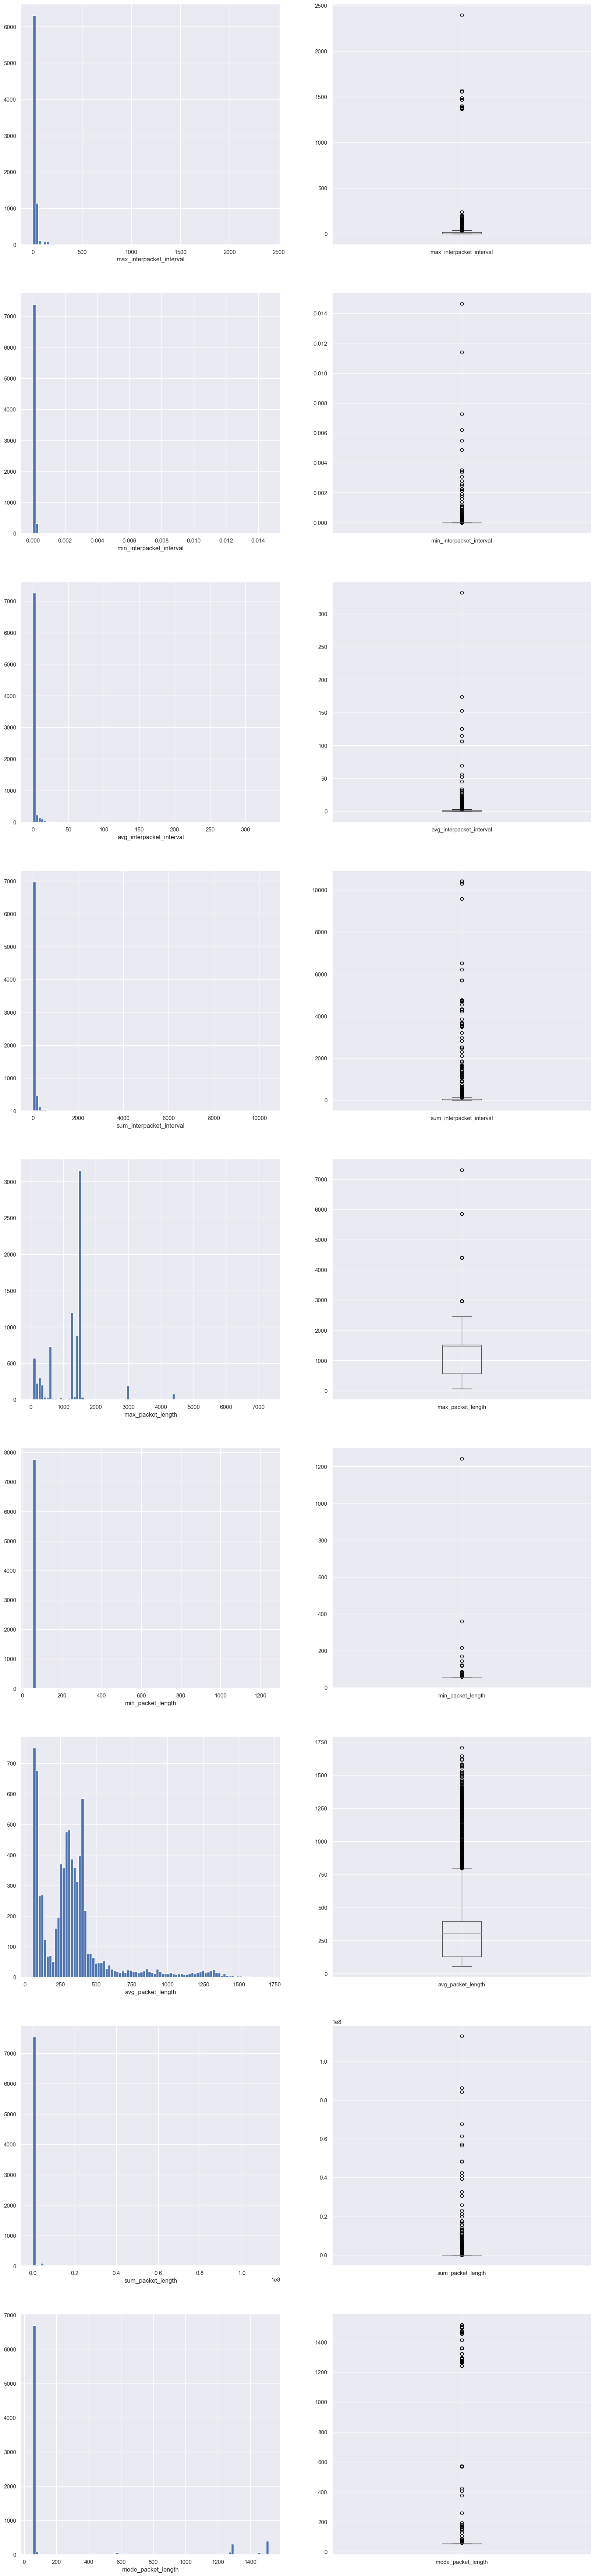

In [11]:
def df_plot(df):
    """
    Строит гистограммы и диаграммы размаха для каждого числового столбца в DataFrame.
    """
    # Получаем список числовых столбцов в DataFrame
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    # Устанавливаем размер холста в зависимости от количества столбцов
    fig, axes = plt.subplots(
        nrows=len(numeric_columns), ncols=2,
        figsize=(20, len(numeric_columns) * 10),
    )
    
     # Проходимся по каждому числовому столбцу и строим графики
    for idx, col in enumerate(numeric_columns):
        df[col].hist(
            ax=axes[idx, 0], 
            bins=88,
        )
        axes[idx, 0].set_xlabel(col)
        
        df.boxplot(column=col, ax=axes[idx, 1])
    # Отображение всех графиков
    plt.show()
    
df_plot(df)

## Шаг 6: Построение матрицы корреляции
Матрица корреляции помогает понять взаимосвязь между числовыми переменными в вашем наборе данных. Она показывает, как сильно связанные между собой переменные и позволяет выявить возможные зависимости или мультиколлинеарность.
Для построения матрицы корреляции используйте функцию `plot_corr_matrix()` для расчета корреляций между переменными, а затем визуализируйте ее с помощью тепловой карты.

In [12]:
# корреляция более 40%
df.select_dtypes(include=['number']).corr() > 0.4

,max_interpacket_interval,min_interpacket_interval,avg_interpacket_interval,sum_interpacket_interval,max_packet_length,min_packet_length,avg_packet_length,sum_packet_length,mode_packet_length
max_interpacket_interval,True,False,True,True,False,False,False,False,False
min_interpacket_interval,False,True,False,False,False,False,False,False,False
avg_interpacket_interval,True,False,True,True,False,False,False,False,False
sum_interpacket_interval,True,False,True,True,False,False,False,False,False
max_packet_length,False,False,False,False,True,False,True,False,False
min_packet_length,False,False,False,False,False,True,False,False,False
avg_packet_length,False,False,False,False,True,False,True,False,True
sum_packet_length,False,False,False,False,False,False,False,True,False
mode_packet_length,False,False,False,False,False,False,True,False,True


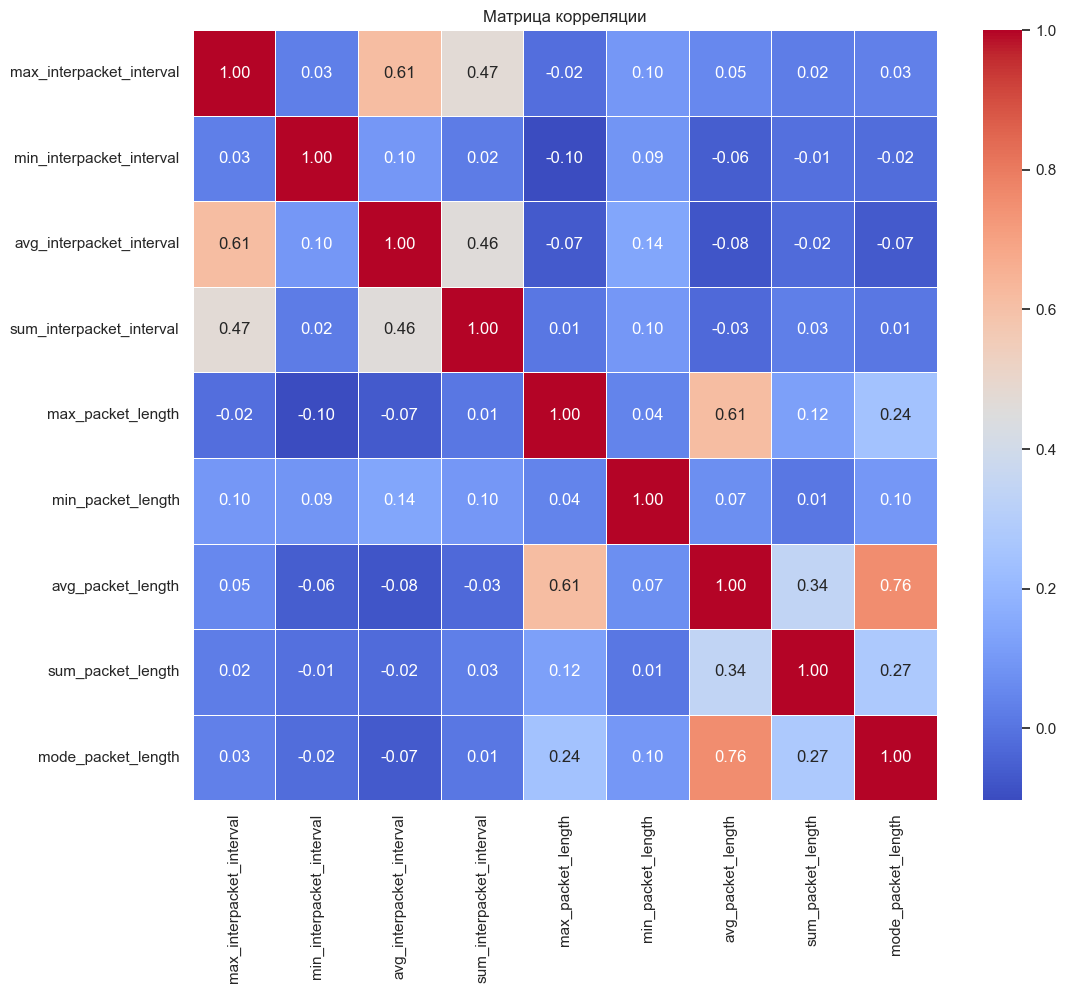

In [13]:
plot_corr_matrix(df)

## Шаг 7: Определение соотношения классов в исходном наборе данных.
Классы записаны в столбце `label`. Для начала определите сколько всего классов есть. После чего подсчитайте итоговое соотношение классов.

In [14]:
# итоговое соотношение в количестве
df['label'].value_counts()

label
normal       7001
malicious     792
Name: count, dtype: int64

In [15]:
# итоговое соотношение в процентах
df['label'].value_counts(normalize=True)*100

label
normal       89.837033
malicious    10.162967
Name: proportion, dtype: float64

## **Шаг 8**: Подведите итог исследования исходного набора данных,
что вы наблюдаете? Какие столбцы из исходного набора данных могут быть использованы для дальнейшего обучения?

### Итог исследования исходного набора данных

В ходе исследования исходного набора данных я наблюдал следующее:

#### 1. Структура и качество данных
- Набор данных содержит 7793 записи и 12 столбцов.
- Все столбцы не содержат пропущенных значений, что упрощает процесс подготовки данных к обучению.
- Столбцы включают как числовые признаки (такие как интервалы между пакетами, длина пакетов), так и категориальные (например, `Flow` и метка `label`).

#### 2. Распределение и выбросы
- Анализ распределения данных с помощью гистограмм и диаграмм размаха (boxplot) показал, что некоторые числовые столбцы имеют большие выбросы. Это особенно касается столбцов, таких как `max_interpacket_interval` и `sum_interpacket_interval`, что может указывать на наличие аномальных или экстремальных значений.
- Важно учитывать выбросы при обучении модели, так как они могут существенно повлиять на производительность и устойчивость модели.

#### 3. Корреляция между переменными
- Корреляционная матрица показала, что некоторые признаки имеют высокую корреляцию между собой, например, `max_packet_length`, `avg_packet_length` и другие показатели длины пакетов.

#### 4. Соотношение классов
- Набор данных имеет сильный дисбаланс классов: 89.84% записей относятся к классу `normal`, и только 10.16% — к классу `malicious`. Такой дисбаланс может привести к смещению модели в сторону более распространенного класса.

### Столбцы, подходящие для дальнейшего обучения
Для дальнейшего обучения модели могут быть полезны следующие числовые признаки:
1. `max_interpacket_interval`
2. `min_interpacket_interval`
3. `avg_interpacket_interval`
4. `sum_interpacket_interval`
5. `max_packet_length`
6. `min_packet_length`
7. `avg_packet_length`
8. `sum_packet_length`
9. `mode_packet_length`

Эти признаки дают хорошее представление о характере трафика и могут быть полезными для классификации. Однако следует учесть корреляции между некоторыми из них, чтобы избежать избыточности.

# Фильтрация данных

После выполнения анализа исходного набора данных, можно приступать к обработке исходных данных. Первым шагом чаще всего является фильтрация набора данных, удаление выбросов из исходного набора данных. 

Фильтрация данных — это ключевой шаг в подготовке данных для анализа и построения моделей машинного обучения. Неправильные или крайние значения могут сильно искажать результаты и приводить к ненадежным выводам. На этом шаге мы рассмотрим два популярных метода фильтрации данных: Boxplot и Z-оценка. Каждый из них имеет свои преимущества и может быть выбран в зависимости от характера данных и целей анализа.

Разделить DataFrame относительно классов, чтобы доминирующий класс не повлиял на фильтрацию данных меньших классов.


In [16]:
df_normal = df[df['label'] == 'normal']
df_malicious = df[df['label'] == 'malicious']

Отфильтруйте DataFrame полученных с прошлых шагов с использованием функций:
- `remove_outliers_quartile` фильтрация на основе квартилей, которые мы наблюдали при построение boxplot, значения находящиеся за усами будут отброшены (удаленны из исходного DataFrame)
- `remove_outliers_zscore` фильтрация на основе Z-оценки — это мера, которая показывает, насколько значение в наборе данных отклоняется от среднего значения этого набора, выраженная в стандартных отклонениях

In [17]:
# DataFrame фильтрованный по квартилям
df_q = pd.concat([
    remove_outliers_quartile(df_normal), 
    remove_outliers_quartile(df_malicious),
])

In [18]:
# DataFrame фильтрованный по Z-оценке
df_z = pd.concat([
    remove_outliers_zscore(df_normal),
    remove_outliers_zscore(df_malicious),
])

После чего постройте boxplot полученного нового DataFrame.

remove_outliners_quartile


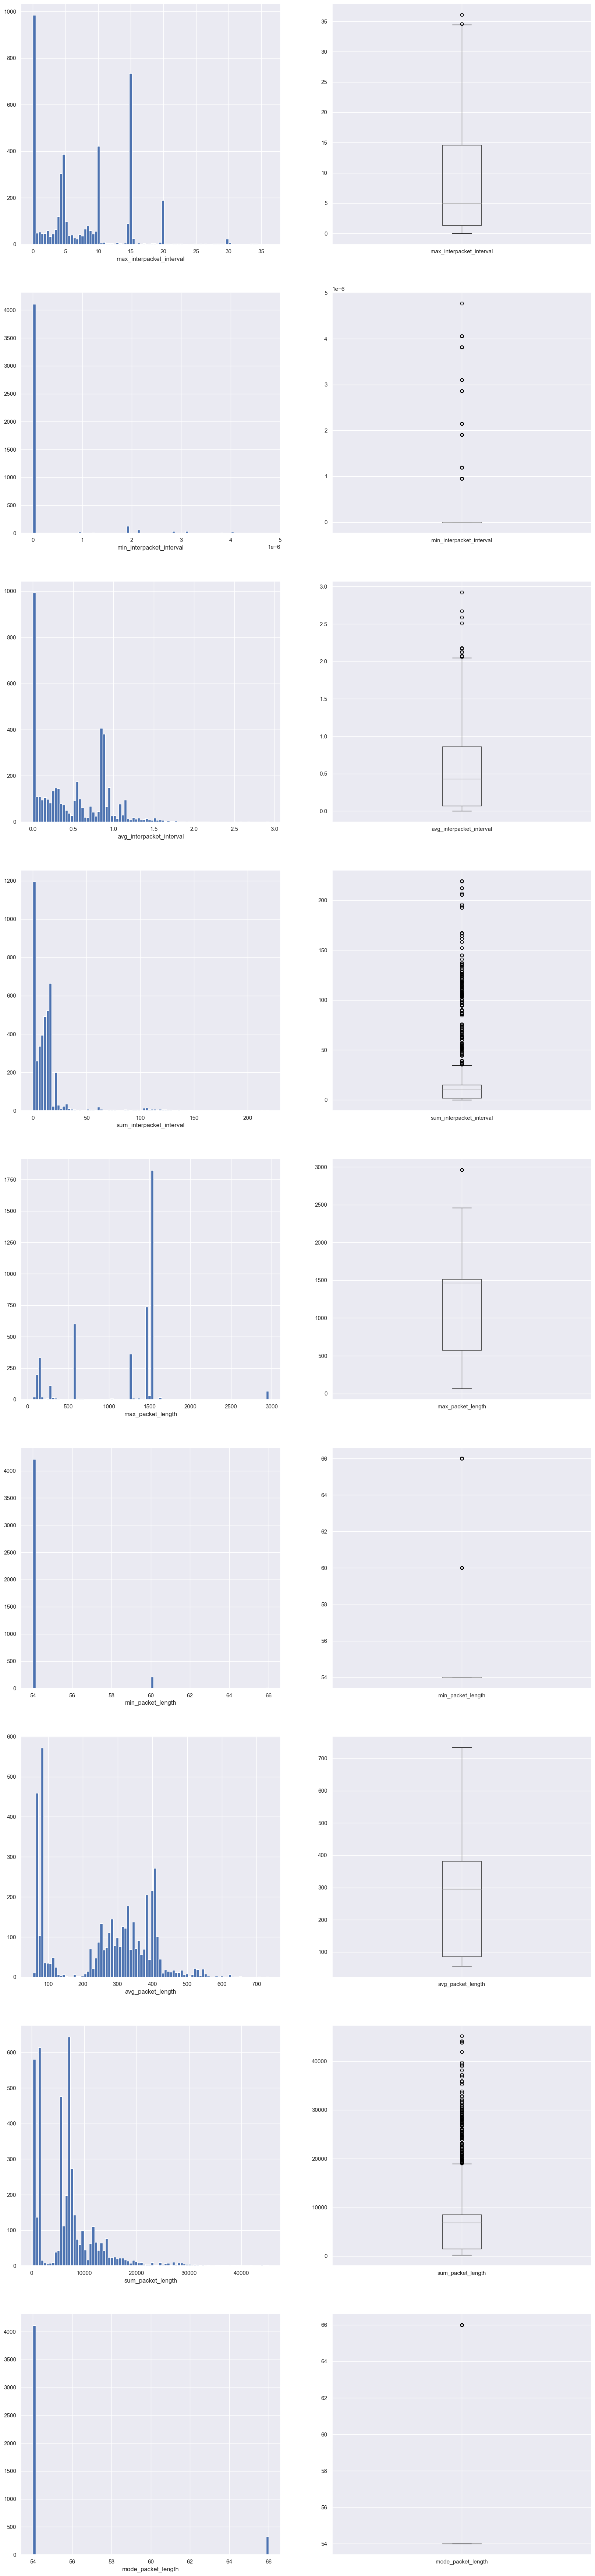

In [19]:
print('remove_outliners_quartile')
df_plot(df_q)

remove_outliners_zscore


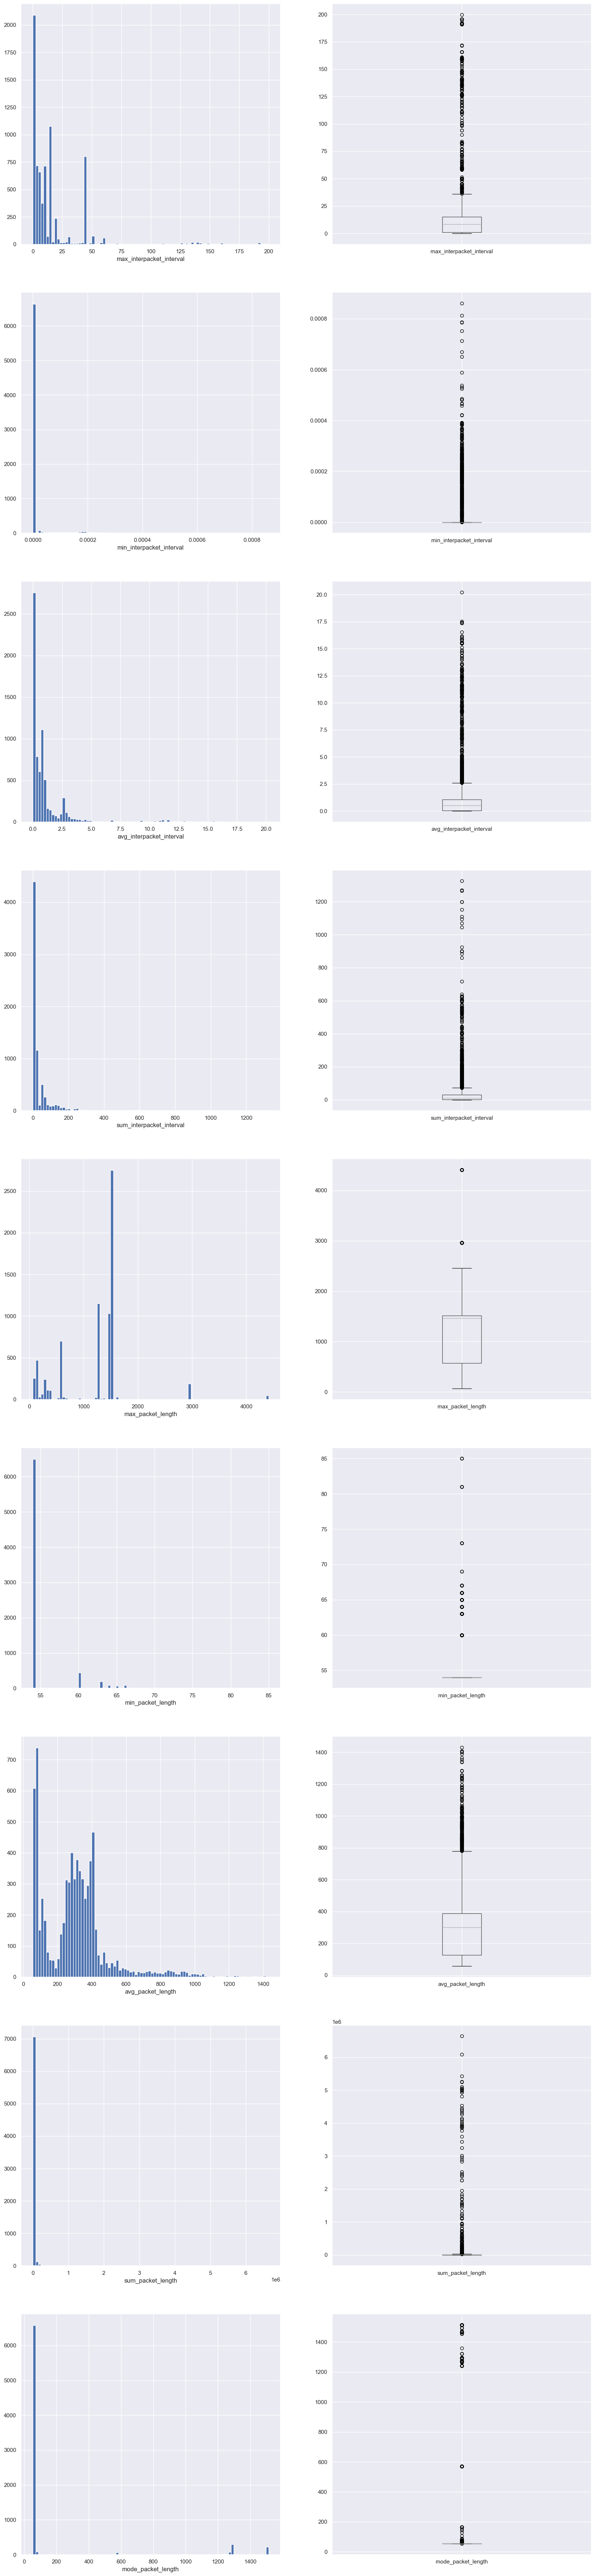

In [20]:
print('remove_outliners_zscore')
df_plot(df_z)

 Что вы видите теперь, что-то изменилось?

После применения метода на основе квартилей, количество выбросов уменьшилось, и "усы" стали короче.
На текущем наборе данных метод квартилей более аггрессивный при фильтрации данных

# Преобразование данных
После фильтрации данных, следующим важным шагом является преобразование данных. Преобразование данных необходимо для подготовки данных к анализу и построению моделей машинного обучения. На этом шаге мы рассмотрим два основных метода преобразования данных: `StandardScaler` и `PowerTransformer`. Каждый из этих методов имеет свои особенности и применяется для решения различных задач.

Преобразование данных: Зачем это нужно?

Преобразование данных помогает нормализовать или стандартизировать данные, устраняя различия в масштабах и распределениях. Это важно для улучшения производительности моделей машинного обучения и повышения точности прогнозов. Преобразование данных может также помочь сделать данные более симметричными и привести их к нормальному распределению. Например, PCA предполагает многомерную нормальность распределения данных, аналогично K-NN чувствителен к масштабу и распределению данных.

`StandardScaler` — это метод стандартизации данных, который приводит их к нулевому среднему значению и единичному стандартному отклонению. Этот метод полезен, когда данные имеют разный масштаб или когда признаки имеют разные единицы измерения.

`PowerTransformer` — это метод преобразования данных, который применяется для улучшения симметрии распределения данных и приведения их к нормальному распределению. Это особенно полезно, когда данные имеют сильное смещение или отклонения от нормального распределения. В его основе лежит два типа преобразований: Box-Cox и Yeo-Johnson. Box-Cox требует положительных данных, тогда как Yeo-Johnson работает с любыми данными.

Воспользуйтесь обоими преобразованиями и постройте распределения признаков, после их преобразования.


In [21]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Создаем экземпляр StandardScaler, который будет использоваться для стандартизации числовых данных.
scaler = StandardScaler()
# Создаем экземпляр PowerTransformer с методом 'yeo-johnson' для стабилизации дисперсии и уменьшения асимметрии данных.
power_transformer = PowerTransformer(method='yeo-johnson')

# Применяем StandardScaler и PowerTransformer к числовым столбцам DataFrame df_q.
scaled_q = scaler.fit_transform(df_q.select_dtypes(include=['number']))
powered_q = power_transformer.fit_transform(df_q.select_dtypes(include=['number']))

# Применяем StandardScaler и PowerTransformer к числовым столбцам DataFrame df_z.
scaled_z = scaler.fit_transform(df_z.select_dtypes(include=['number']))
powered_z = power_transformer.fit_transform(df_z.select_dtypes(include=['number']))

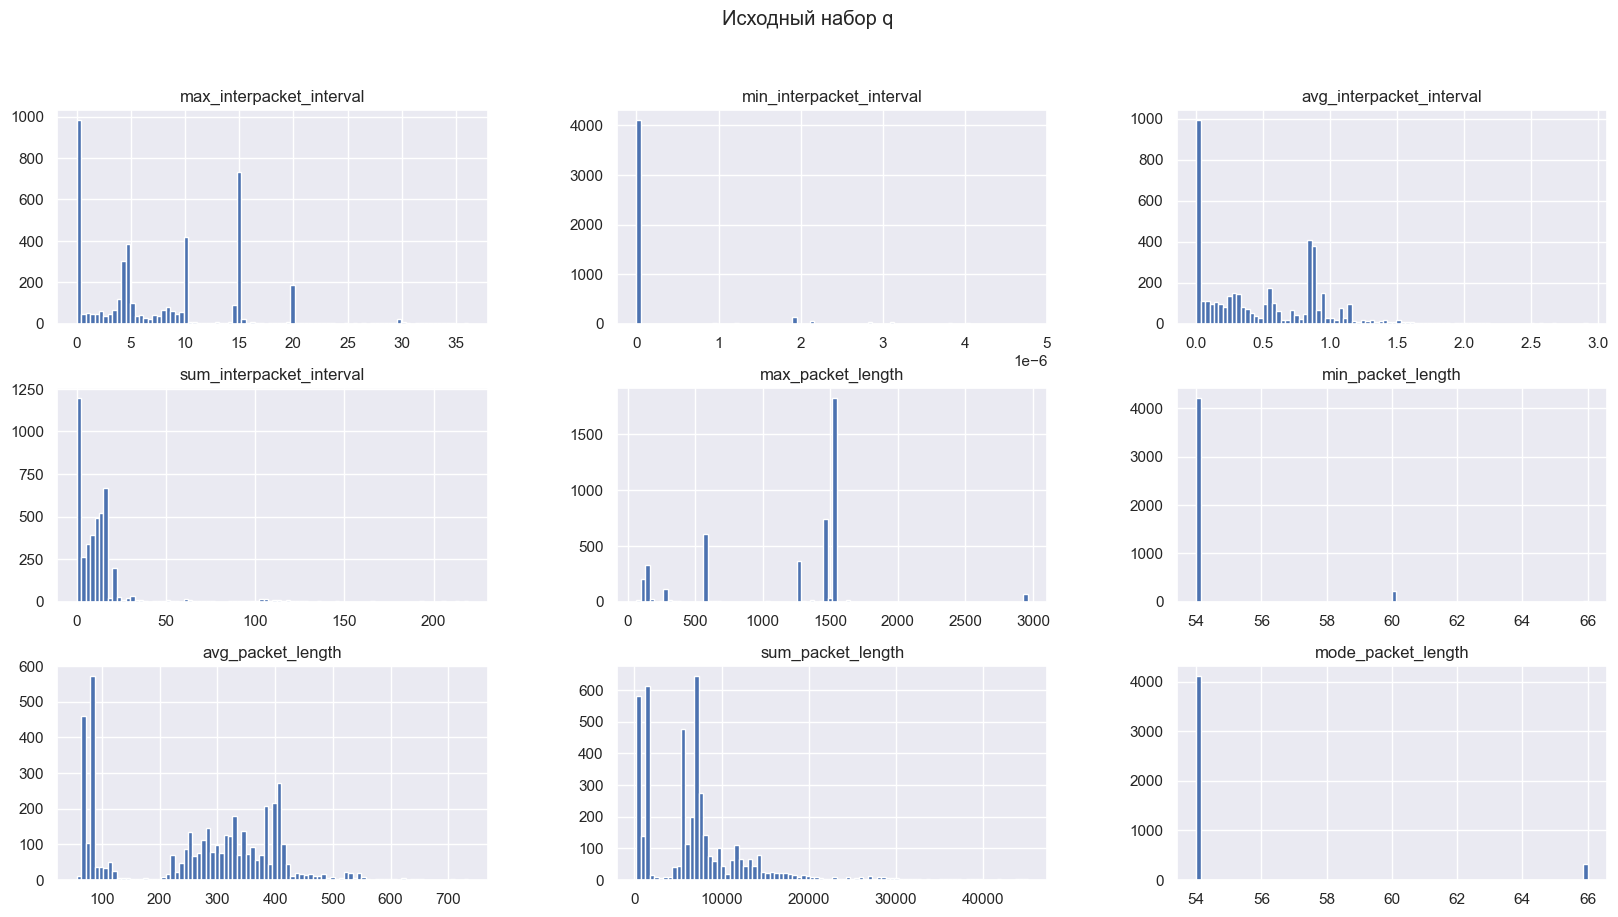

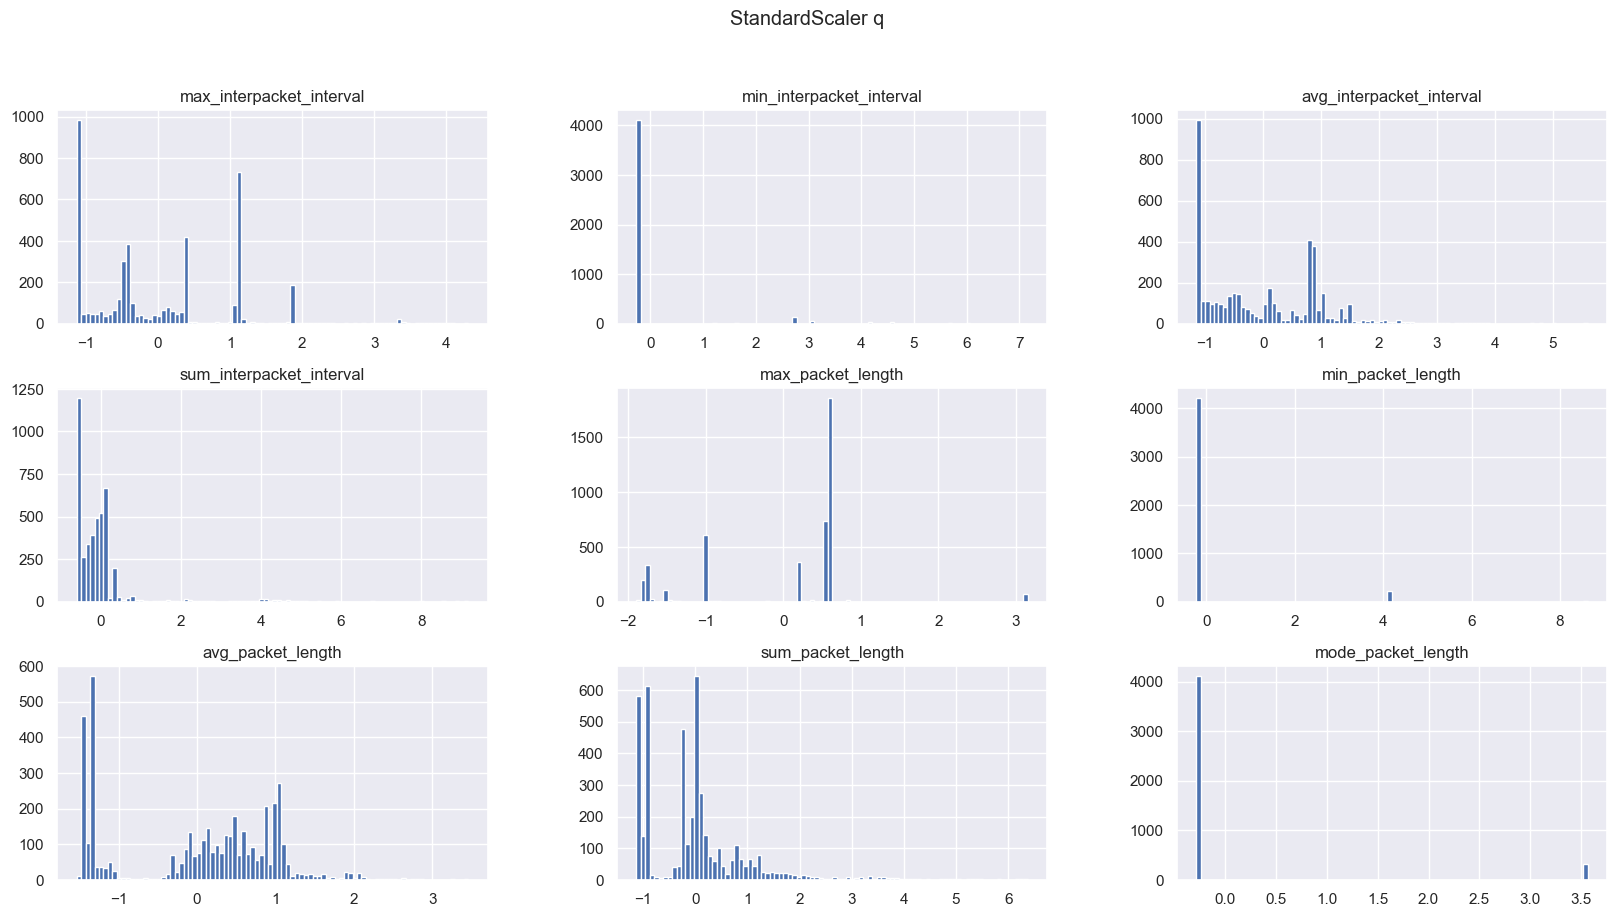

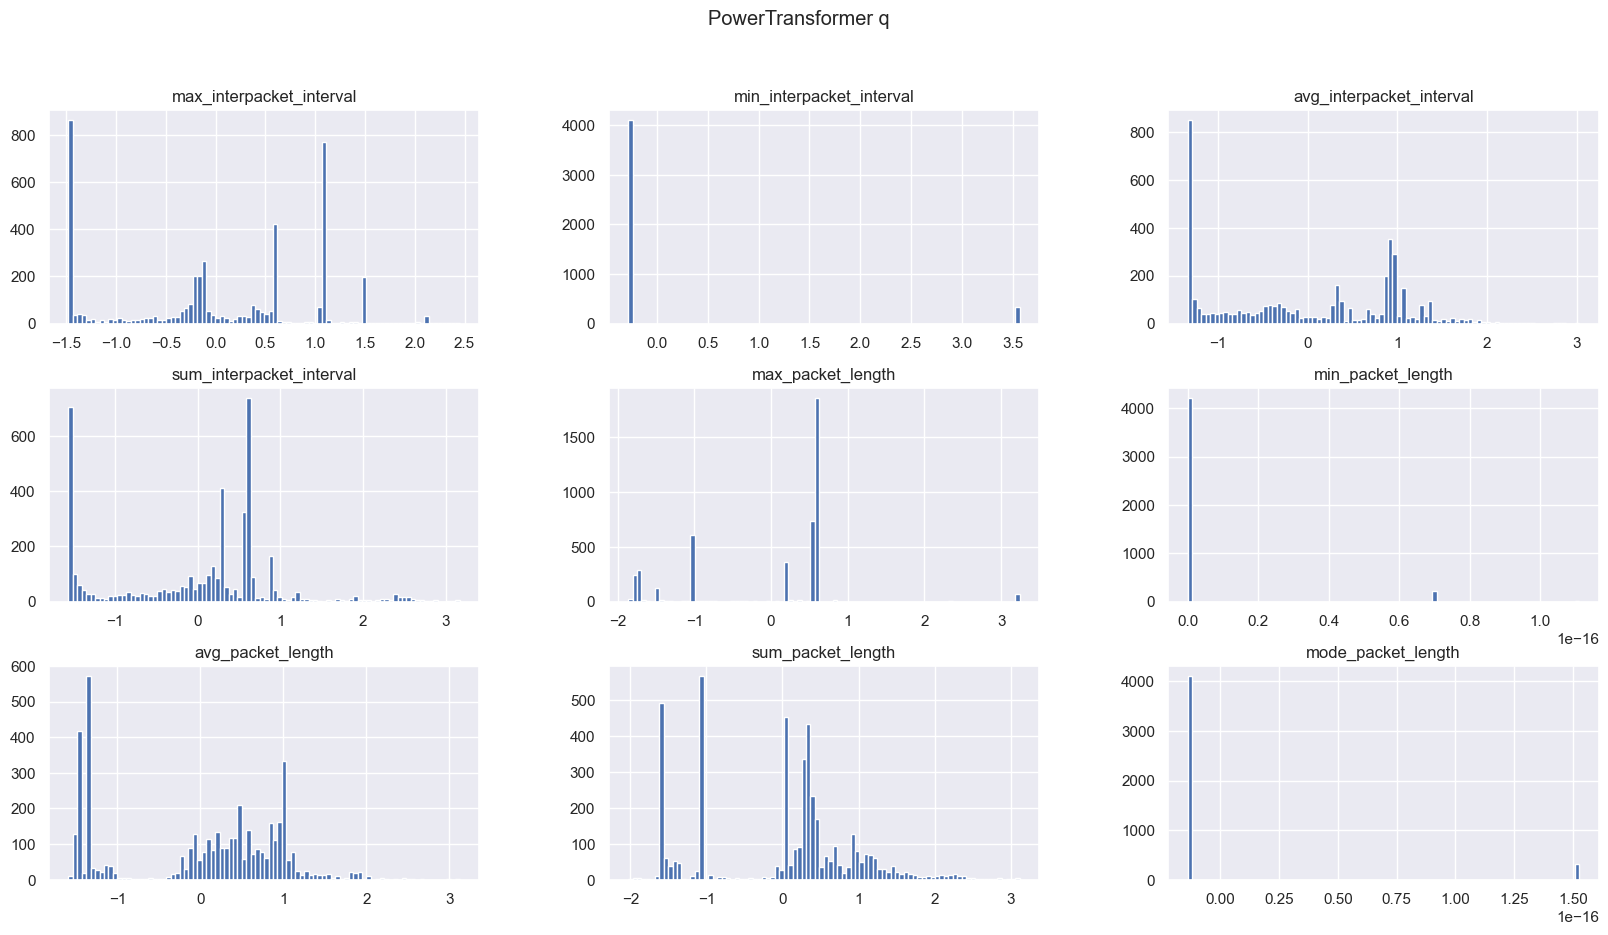

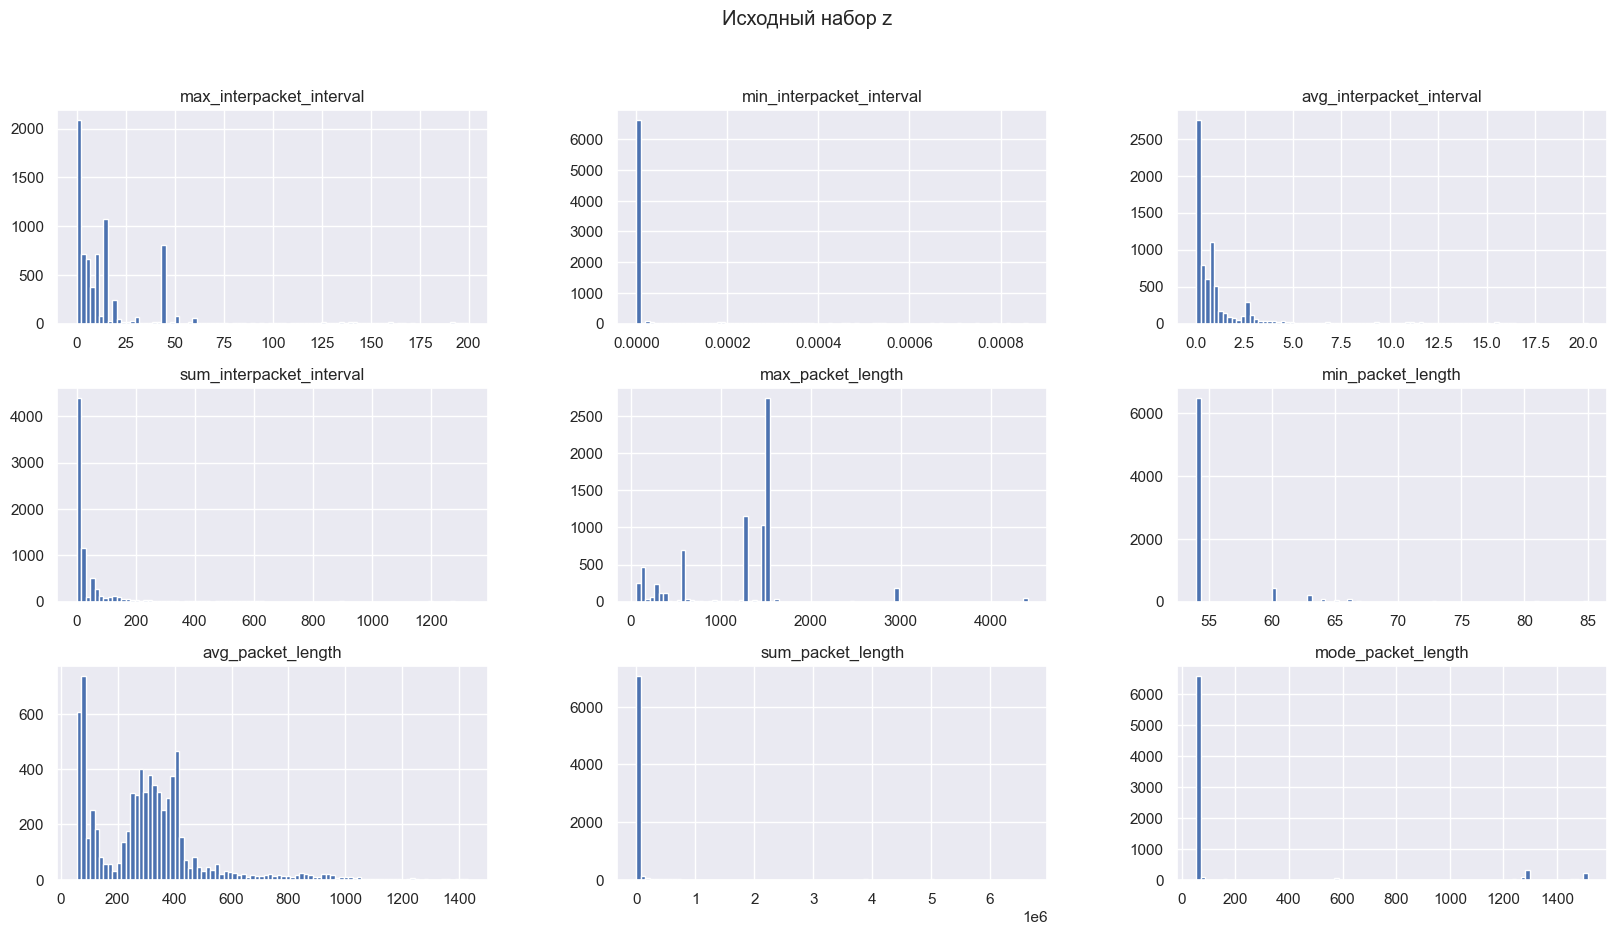

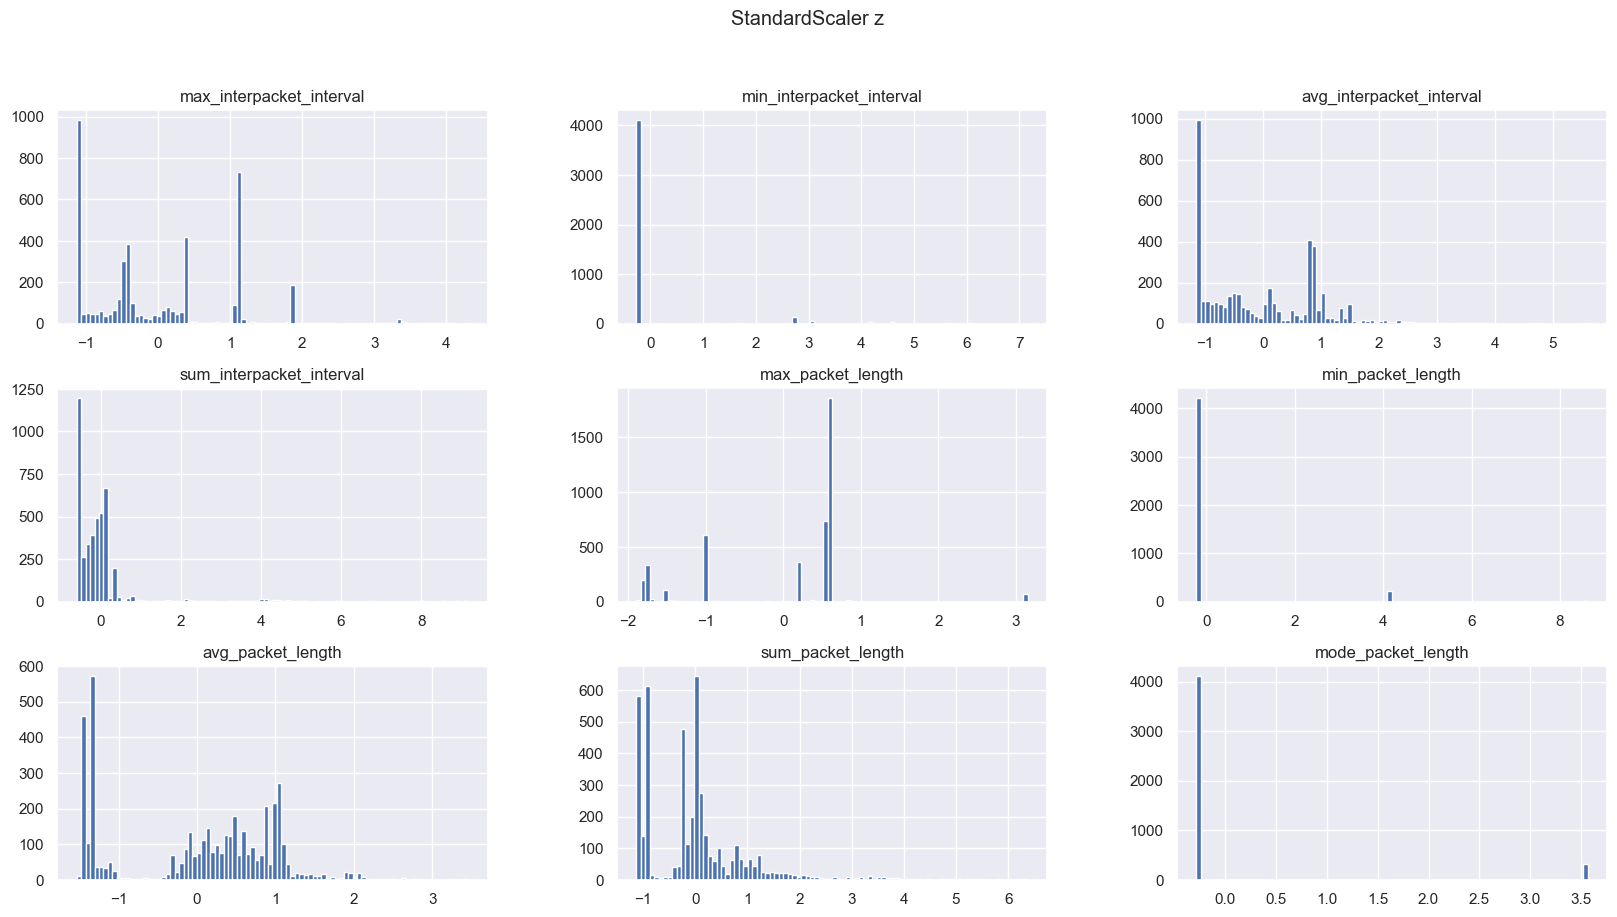

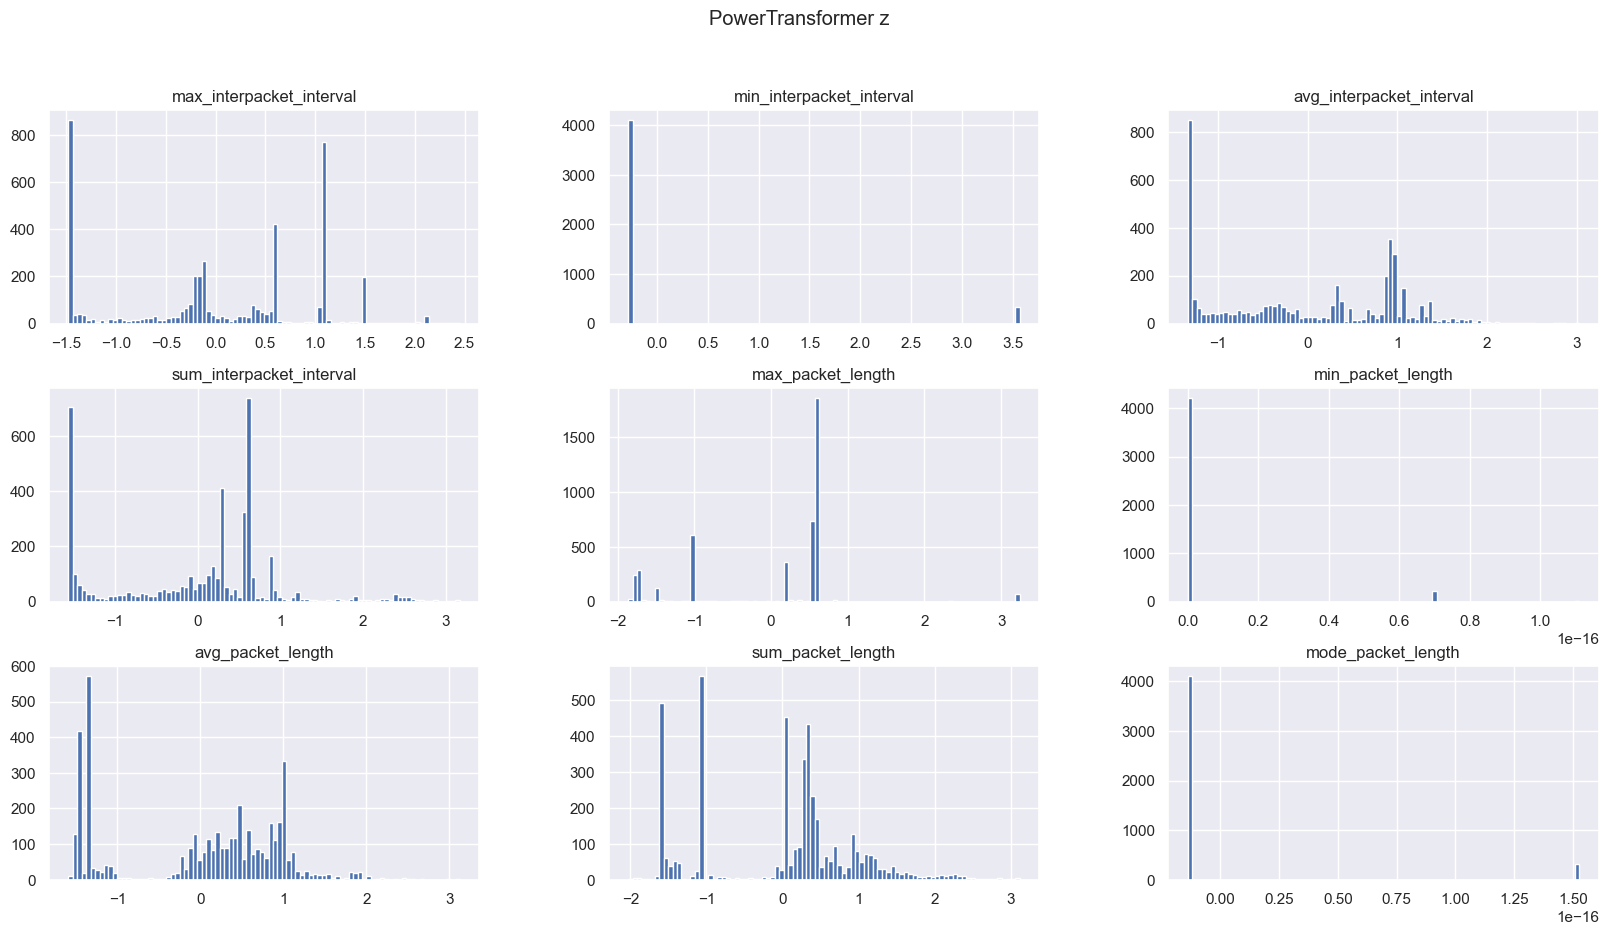

In [22]:
# Визуализируем распространение значений в оригинальном DataFrame и его стандартизированных модификаций 
def plot_frames(dfs):
    for title, df in dfs.items():
        df.hist(bins=88) 
        plt.suptitle(title)
        
plot_frames({
    'Исходный набор q': df_q,
    'StandardScaler q': pd.DataFrame(scaled_q, columns=df_q.select_dtypes(include=['number']).columns),
    'PowerTransformer q': pd.DataFrame(powered_q, columns=df_q.select_dtypes(include=['number']).columns),
})

plot_frames({
    'Исходный набор z': df_z,
    'StandardScaler z': pd.DataFrame(scaled_q, columns=df_q.select_dtypes(include=['number']).columns),
    'PowerTransformer z': pd.DataFrame(powered_q, columns=df_q.select_dtypes(include=['number']).columns),
})

In [23]:
# Создаем модель RandomForestClassifier с фиксированным значением random_state для обеспечения воспроизводимости
rf_model = RandomForestClassifier(random_state=999)

# Определяем признаки, удаляя столбцы 'label' и 'Flow', которые не будут использоваться в качестве признаков
features = df_q.drop(columns=['label', 'Flow'])
# Определяем целевую переменную 'label'
target = df_q['label']

# Выполняем кросс-валидацию для оценки модели, возвращая точности для каждого фолда и лучшую модель
accuracy_scores, best_rf_model = cross_validation(rf_model, features.values, target.values)

# Вывод результатов кросс-валидации
print("Точности для каждого фолда:", accuracy_scores)
print("Средняя точность:", sum(accuracy_scores) / len(accuracy_scores))

# Сохраняем лучшую модель в файл
with open('./model.pickle', 'wb') as f:
    pickle.dump(best_rf_model, f)

Точности для каждого фолда: [1.0, 1.0, 1.0]
Средняя точность: 1.0


In [34]:
# Тест загрузки модели из дампа pickle
with open('./model.pickle', 'rb') as f:
    best_rf_model = pickle.load(f)

# Берём оригинальные данные и пробуем на них провести предсказание
df_test = remove_outliers_quartile(df.copy())
df_test['predict'] = best_rf_model.predict(
    df_test.select_dtypes(include=['number']).values
)

# выводим результаты распознования в конексте ошибок предсказания
_total = len(df_test)
_errors = len(df_test[df_test['label'] != df_test['predict']])
_accuracy = 100 - (_errors/_total)*100

print('\n'.join((
    f'всего данных = {_total}',
    f'кол-во ошибок распознавания = {_errors}',
    f'точность распознавания = {_accuracy}',
    '='*79
)))
df_test[
    df_test['label'] != df_test['predict']
]

всего данных = 4106
кол-во ошибок распознавания = 0
точность распознавания = 100.0


,Flow,max_interpacket_interval,min_interpacket_interval,avg_interpacket_interval,sum_interpacket_interval,max_packet_length,min_packet_length,avg_packet_length,sum_packet_length,mode_packet_length,label,predict
